<a href="https://colab.research.google.com/github/MaricelaMH/SIMULACION-II/blob/main/Integral%20(MC).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
# Importamos libreria necesarias
import numpy as np
import random as rnd
import matplotlib.pyplot as plt

In [63]:
# Definimos nuestra funcion
def f(x):
  return np.cos((np.pi*x)/2)

In [74]:
# Método de Monte Carlo para aproximar la integral
def monte_carlo_integral(a, b, N):
    # Generaramos N puntos aleatorios en el intervalo [a, b]
    puntos = np.random.uniform(a, b, N)

    # Evaluar la función en los puntos aleatorios
    valores_funcion = f(puntos)

    # Calcular la media de los valores de la función
    media = np.mean(valores_funcion)

    # Multiplicar la media por el tamaño del intervalo (b - a)
    integral = (b - a) * media
    return integral

In [75]:
# Calcular la integral utilizando Monte Carlo
resultado= monte_carlo_integral(0, 1, 100)

In [76]:
print(f"Estimación de la integral: {resultado}")

Estimación de la integral: 0.6396695163654844


In [77]:
# Función para realizar varias simulaciones y graficar el histograma
def graficar_histograma(a, b, N, iteraciones):
    resultados = []

    for _ in range(iteraciones):
        resultado = monte_carlo_integral(a, b, N)
        resultados.append(resultado)

    # Graficar el histograma de los resultados
    plt.hist(resultados, bins=30, density=True, alpha=0.75, color='blue')
    plt.title("Histograma de aproximaciones de Monte Carlo")
    plt.xlabel("Valor de la aproximación de la integral")
    plt.ylabel("Densidad de probabilidad")
    plt.grid(True)
    plt.show()

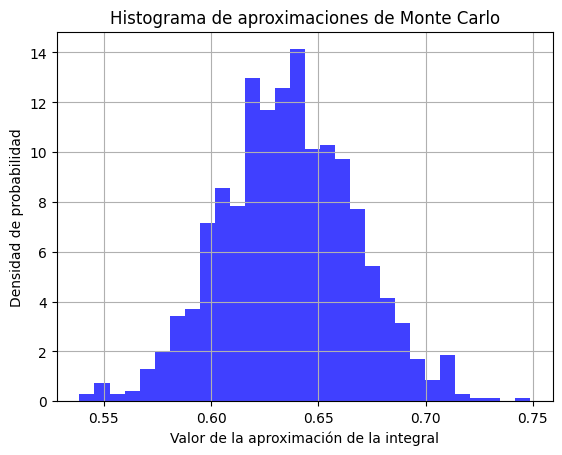

In [78]:
# Graficar el histograma
iteraciones = 1000
graficar_histograma(0, 1, 100, iteraciones)

In [86]:
# Función para realizar varias simulaciones, graficar el histograma y calcular el intervalo de confianza
def calcular_intervalo_confianza(a, b, N, iteraciones):
    resultados = []

    for _ in range(iteraciones):
        resultado = monte_carlo_integral(a, b, N)
        resultados.append(resultado)

    # Convertir resultados en un array de numpy
    resultados = np.array(resultados)

    # Calcular la media y desviación estándar de los resultados
    media = np.mean(resultados)
    desviacion_estandar = np.std(resultados)

# Calcular el intervalo de confianza del 95%
    margen_error = 1.96 * (desviacion_estandar / np.sqrt(iteraciones))
    intervalo_confianza = (media - margen_error, media + margen_error)

  # Redondear la media y el intervalo de confianza a 2 decimales
    media_redondeada = round(media, 2)
    intervalo_confianza_redondeado = (round(intervalo_confianza[0], 2), round(intervalo_confianza[1], 2))

    # Mostrar el intervalo de confianza
    print(f"Media aproximada: {media}")
    print(f"Desviación estándar: {desviacion_estandar}")
    print(f"Intervalo de confianza del 95%: {intervalo_confianza_redondeado}")

In [87]:
# Calcular el intervalo de confianza y graficar el histograma
calcular_intervalo_confianza(0, 1, 100, iteraciones)

Media aproximada: 0.6358593316283797
Desviación estándar: 0.030658181892191144
Intervalo de confianza del 95%: (0.63, 0.64)
